In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [32]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import opendatasets as od

In [34]:
od.download("https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset")

Skipping, found downloaded files in "./horses-or-humans-dataset" (use force=True to force download)


In [35]:
### Importing Required Libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
## Genrators

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/content/horses-or-humans-dataset/horse-or-human/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/content/horses-or-humans-dataset/horse-or-human/validation",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150, 150)
)

Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.


In [37]:
### Normalizing the dataset

def process(image,label):
  image = tf.cast(image/255 , tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [38]:
### Creating CNN model structure

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 3), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 3), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 3), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 3), strides=2, padding="valid"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


**Data Augumentation**

In [39]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode="nearest"
)

In [40]:
train_generator = train_datagen.flow_from_directory(
    "/content/horses-or-humans-dataset/horse-or-human/train",
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary"
)


Found 1027 images belonging to 2 classes.


In [41]:
validation_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode="nearest"
)

In [42]:
validation_dataset = validation_datagen.flow_from_directory(
    "/content/horses-or-humans-dataset/horse-or-human/validation",
    target_size=(256, 256),
    batch_size=32,
    class_mode="binary"
)

Found 256 images belonging to 2 classes.


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 126, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 127, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 127, 126, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 124, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 61, 64)      

In [44]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
### Applying early stopping

early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [46]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
33/33 [==============================] - 43s 1s/step - loss: 0.3749 - accuracy: 0.8354 - val_loss: 8.6525 - val_accuracy: 0.4922
Epoch 2/100
33/33 [==============================] - 25s 758ms/step - loss: 0.2731 - accuracy: 0.8861 - val_loss: 5.0979 - val_accuracy: 0.5078
Epoch 3/100
33/33 [==============================] - 26s 806ms/step - loss: 0.2255 - accuracy: 0.9065 - val_loss: 3.5457 - val_accuracy: 0.5117
Epoch 4/100
33/33 [==============================] - 25s 764ms/step - loss: 0.1542 - accuracy: 0.9455 - val_loss: 2.5055 - val_accuracy: 0.5312
Epoch 5/100
33/33 [==============================] - 27s 807ms/step - loss: 0.1359 - accuracy: 0.9523 - val_loss: 1.3721 - val_accuracy: 0.5781
Epoch 6/100
33/33 [==============================] - 25s 763ms/step - loss: 0.0981 - accuracy: 0.9649 - val_loss: 1.7766 - val_accuracy: 0.5391
Epoch 7/100
33/33 [==============================] - 25s 760ms/step - loss: 0.1296 - accuracy: 0.9552 - val_loss: 1.1628 - val_accuracy: 0.

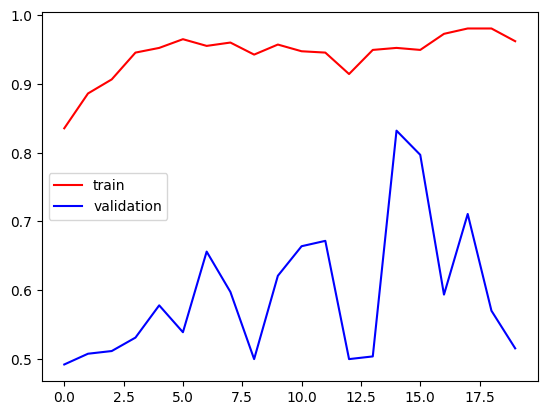

In [47]:
### Checking the validation accuracy

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

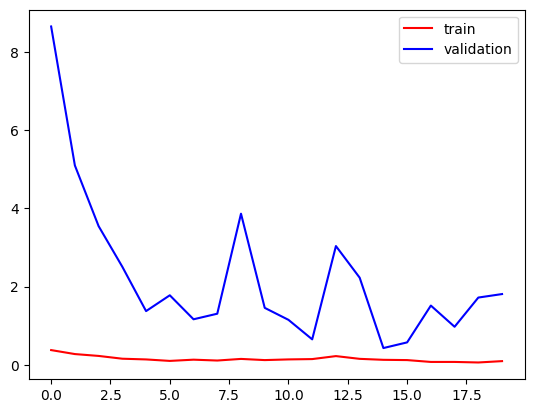

In [48]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

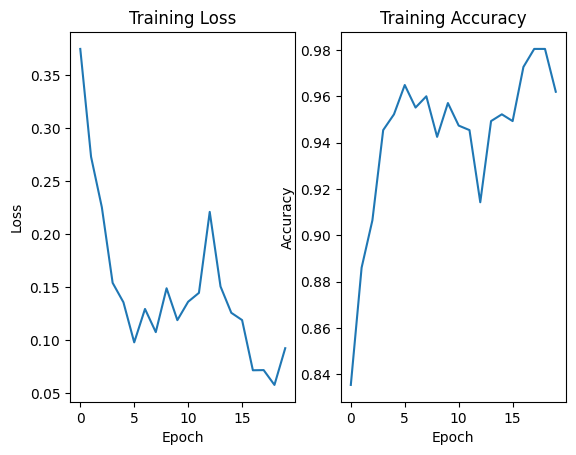

In [49]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(history.history['loss'])
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training Loss')

axs[1].plot(history.history['accuracy'])
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training Accuracy')

plt.show()

**Accuracy is not good , So Applying Transfer Learning Technique to do so ----> Applying Fine Tuning Transfer Learning Technique*<-------- **

In [79]:
### For transfer learning importing required libraries from keras

from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D

In [91]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

In [92]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [93]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


**Creating a new model with same early stopping and dropouts which I defined earlier and using the same Agumented data that i have created earlier **

In [94]:
model1 = Sequential()

In [95]:
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(256, activation="relu"))
model1.add(Dense(256, activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))

In [96]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [97]:
history1 = model1.fit(
    train_generator,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=[early_stopping]
)

Epoch 1/100
33/33 [==============================] - 32s 834ms/step - loss: 0.1971 - accuracy: 0.9153 - val_loss: 0.1643 - val_accuracy: 0.9609
Epoch 2/100
33/33 [==============================] - 28s 849ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 2.6344 - val_accuracy: 0.6797
Epoch 3/100
33/33 [==============================] - 27s 809ms/step - loss: 0.0179 - accuracy: 0.9951 - val_loss: 0.2665 - val_accuracy: 0.9023
Epoch 4/100
33/33 [==============================] - 27s 809ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.4926 - val_accuracy: 0.8633
Epoch 5/100
33/33 [==============================] - 27s 815ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.4255 - val_accuracy: 0.9688
Epoch 6/100
33/33 [==============================] - 27s 815ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9727
Epoch 7/100
33/33 [==============================] - 26s 803ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1769 - val_accuracy:

In [99]:
### Checking on genral images for testing purpose

import cv2

Exception ignored in: <function _xla_gc_callback at 0x7fc02b36f2e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [101]:
test_image= cv2.imread("/content/horses-or-humans-dataset/horse-or-human/horse-or-human/train/humans/human01-04.png")

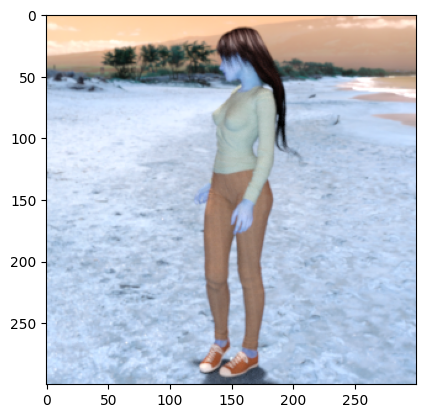

In [102]:
plt.imshow(test_image)

In [104]:
test_image.shape

(300, 300, 3)

In [105]:
test_image = cv2.resize(test_image,(256,256))

In [107]:
test_input = test_image.reshape((1,256,256,3))

In [108]:
model1.predict(test_input)

1/1 [==============================] - 2s 2s/step


array([[0.99717283]], dtype=float32)